In [1]:
import numpy as np
from fsetools.lib.fse_travelling_fire import temperature_si as func_trav_fire
from fsetools.lib.fse_bs_en_1991_1_2_parametric_fire import temperature as func_param_fire
from fsetools.lib.fse_bs_en_1993_1_2_heat_transfer_c import temperature as func_ht
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-paper')

## Fire models

In [2]:
t = np.arange(0, 120*60+1, 1, dtype=float)
T_trav = func_trav_fire(
    t=t,
    T_0=293.15,
    q_f_d=420e6,
    hrrpua=0.25e6,
    l=50,
    w=16,
    s=0.012,
    e_h=3,
    e_l=50 / 2,
    T_max=1100+273.15
)
T_param = func_param_fire(
    t=t,
    A_v=66,
    A_t=(3*16+16*32+32*3)*2,
    A_f=16*32,
    h_eq=1.5,
    q_fd=420e6,
    lambda_=1,
    rho=1,
    c=720 ** 2,
    t_lim=20 * 60,
    temperature_initial=293.15,
)

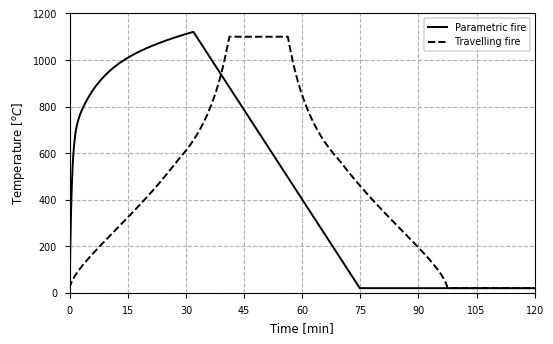

In [3]:
fig, ax = plt.subplots(figsize=(6,3.7), dpi=100)
ax.plot(t/60., T_param-273.15, c='k', ls='-', label='Parametric fire')
ax.plot(t/60., T_trav-273.15, c='k', ls='--', label='Travelling fire')
ax.grid(which='both', ls='--')
ax.set_xlabel('Time [min]', fontsize='small')
ax.set_xlim(0, 120)
ax.set_xticks(np.arange(0, 121, 15))
ax.set_ylabel('Temperature [$^oC$]', fontsize='small')
ax.set_ylim(0,1200)
ax.set_yticks(np.arange(0, 1201, 200))
ax.tick_params(axis='both', which='both', labelsize='x-small')
ax.legend(shadow=False, fancybox=False, edgecolor='k', fontsize='x-small').set_visible(True)
fig.savefig('param_and_trav_fires.png', dpi=600, bbox_inches='tight')

## Heat transfer

In [4]:
kwargs_common = dict(
    beam_rho=7850,
    beam_cross_section_area=0.017,
    protection_k=0.2,
    protection_rho=800,
    protection_c=1700,
    protection_thickness=0.01,
    protection_protected_perimeter=2.14,
)
T_s_trav = func_ht(
    fire_time=t,
    fire_temperature=T_trav,
    **kwargs_common
)
T_s_param = func_ht(
    fire_time=t,
    fire_temperature=T_param,
    **kwargs_common
)

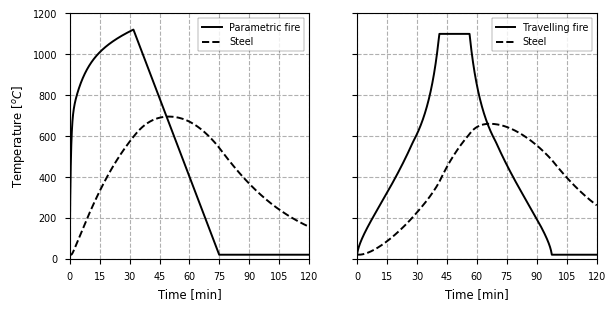

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6.8, 3.25), dpi=100, sharey=True)

ax1.plot(t/60., T_param-273.15, c='k', ls='-', label='Parametric fire')
ax1.plot(t/60., T_s_param-273.15, c='k', ls='--', label='Steel')
ax2.plot(t/60., T_trav-273.15, c='k', ls='-', label='Travelling fire')
ax2.plot(t/60., T_s_trav-273.15, c='k', ls='--', label='Steel')
for ax in (ax1, ax2):
    ax.grid(which='both', ls='--')
    ax.set_xlabel('Time [min]', fontsize='small')
    ax.set_xlim(0, 120)
    ax.set_xticks(np.arange(0, 121, 15))
    ax.set_ylim(0,1200)
    ax.set_yticks(np.arange(0, 1201, 200))
    ax.tick_params(axis='both', which='both', labelsize='x-small')
    ax.legend(shadow=False, fancybox=False, edgecolor='k', fontsize='x-small').set_visible(True)

ax1.set_ylabel('Temperature [$^oC$]', fontsize='small');

## Equivalent of time exposure

In [6]:
kwargs_common['protection_thickness'] = 0.0125
T_s_param = func_ht(
    fire_time=t,
    fire_temperature=T_param,
    **kwargs_common
)
T_s_iso = func_ht(
    fire_time=t,
    fire_temperature=273.15+345*np.log10(8*t/60+1)+20.,
    **kwargs_common
)

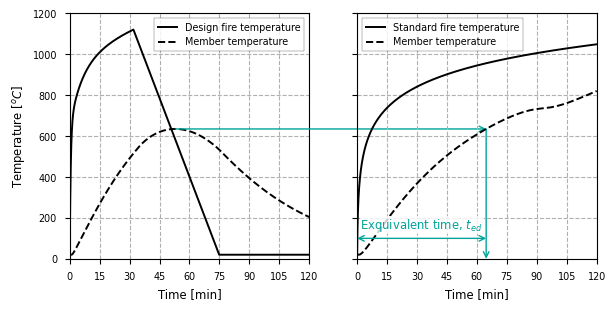

In [7]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6.8, 3.25), dpi=100, sharey=True)

ax1.plot(t/60., T_param-273.15, c='k', ls='-', label='Design fire temperature')
ax1.plot(t/60., T_s_param-273.15, c='k', ls='--', label='Member temperature')
ax2.plot(t/60., 345*np.log10(8*t/60+1)+20., c='k', ls='-', label='Standard fire temperature')
ax2.plot(t/60., T_s_iso-273.15, c='k', ls='--', label='Member temperature')
con1 = ConnectionPatch(
    xyA=(t[np.argmax(T_s_param)]/60., np.amax(T_s_param)-273.15), 
    xyB=(t[np.argmin(abs(T_s_iso-np.amax(T_s_param)))]/60., np.amax(T_s_param)-273.15), 
    coordsA="data", coordsB="data", axesA=ax1, axesB=ax2, arrowstyle="->", shrinkB=0, color=(0, 164/255, 153/255), alpha=1, linewidth=1
)
con2 = ConnectionPatch(
    xyA=(t[np.argmin(abs(T_s_iso-np.amax(T_s_param)))]/60., np.amax(T_s_param)-273.15), 
    xyB=(t[np.argmin(abs(T_s_iso-np.amax(T_s_param)))]/60., 0), 
    coordsA="data", coordsB="data", axesA=ax2, axesB=ax2, arrowstyle="->", shrinkB=0, color=(0, 164/255, 153/255), alpha=1, linewidth=1
)
ax2.annotate("", xy =(0, 100), xytext = (t[np.argmin(abs(T_s_iso-np.amax(T_s_param)))]/60., 100), arrowprops = dict(arrowstyle="<->", shrinkA = 0, shrinkB = 0, linestyle = '-', mutation_scale = 10, color = (0, 164/255, 153/255), linewidth = 1))
ax2.text(t[np.argmin(abs(T_s_iso-np.amax(T_s_param)))]/60./2, 150, 'Exquivalent time, $t_{ed}$', fontsize='small', ha='center', c=(0, 164/255, 153/255), bbox=dict(boxstyle='square,pad=.05', fc=(1, 1, 1, 0.8), ec='none'))
ax2.add_artist(con1)
ax2.add_artist(con2)
for ax in (ax1, ax2):
    ax.grid(which='both', ls='--')
    ax.set_xlabel('Time [min]', fontsize='small')
    ax.set_xlim(0, 120)
    ax.set_xticks(np.arange(0, 121, 15))
    ax.set_ylim(0,1200)
    ax.set_yticks(np.arange(0, 1201, 200))
    ax.tick_params(axis='both', which='both', labelsize='x-small')
    ax.legend(shadow=False, fancybox=False, edgecolor='k', fontsize='x-small').set_visible(True)

ax1.set_ylabel('Temperature [$^oC$]', fontsize='small');
fig.savefig('time-equivalence.png', dpi=600, bbox_inches='tight')

end